HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file to get the data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No nulls , no duplicates are present

In [4]:
# checking the columns of the dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# finding categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 9 categorical variables

The categorical variables are : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [6]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [7]:
pd.options.display.max_colwidth =None
col_name=[]
num=[]
feat=[]
for i in categorical_columns:
    col_name.append(i)
    num.append(len(df[i].unique()))
    feat.append(df[i].unique())
inf=pd.DataFrame({'FEATURE':col_name,"NUMBER OF UNIQUE FEATURES":num,"UNIQUE FEATURES":feat})
inf

FEATURE  NUMBER OF UNIQUE FEATURES  \
0       Attrition                          2   
1  BusinessTravel                          3   
2      Department                          3   
3  EducationField                          6   
4          Gender                          2   
5         JobRole                          9   
6   MaritalStatus                          3   
7          Over18                          1   
8        OverTime                          2   

                                                                                                                                                                      UNIQUE FEATURES  
0                                                                                                                                                                           [Yes, No]  
1                                                                                                                                      [Travel_Rarely, Travel_Frequently, Non-Travel]  
2                                                                                                                                    [Sales, Research & Development, Human Resources]  
3                                                                                                       [Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources]  
4                                                                                                                                                                      [Female, Male]  
5  [Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources]  
6                                                                                                                                                         [Single, Married, Divorced]  
7                                                                                                                                                                                 [Y]  
8                                                                                                                                                                           [Yes, No]

In [8]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 26 numerical variables

The numerical variables are : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [9]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
pd.options.display.max_colwidth =None
col_name=[]
num=[]
feat=[]
for i in numerical_columns:
    col_name.append(i)
    num.append(len(df[i].unique()))
    feat.append(df[i].unique())
inf=pd.DataFrame({'FEATURE':col_name,"NUMBER OF UNIQUE FEATURES":num,"UNIQUE FEATURES":feat})
inf

FEATURE  NUMBER OF UNIQUE FEATURES  \
0                        Age                         43   
1                  DailyRate                        886   
2           DistanceFromHome                         29   
3                  Education                          5   
4              EmployeeCount                          1   
5             EmployeeNumber                       1470   
6    EnvironmentSatisfaction                          4   
7                 HourlyRate                         71   
8             JobInvolvement                          4   
9                   JobLevel                          5   
10           JobSatisfaction                          4   
11             MonthlyIncome                       1349   
12               MonthlyRate                       1427   
13        NumCompaniesWorked                         10   
14         PercentSalaryHike                         15   
15         PerformanceRating                          2   
16  RelationshipSatisfaction                          4   
17             StandardHours                          1   
18          StockOptionLevel                          4   
19         TotalWorkingYears                         40   
20     TrainingTimesLastYear                          7   
21           WorkLifeBalance                          4   
22            YearsAtCompany                         37   
23        YearsInCurrentRole                         19   
24   YearsSinceLastPromotion                         16   
25      YearsWithCurrManager                         18   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      UNIQUE FEATURES  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53, 24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54, 58, 20, 25, 19, 57, 52, 47, 18, 60]  
1                                                                                                                                [1102, 279, 1373, 1392, 591, 1005, 1324, 1358, 216, 1299, 809, 153, 670, 1346, 103, 1389, 334, 1123, 1219, 371, 673, 1218, 419, 391, 699, 1282, 1125, 691, 477, 705, 924, 1459, 125, 895, 813, 1273, 869, 890, 852, 1141, 464, 1240, 1357, 994, 721, 1360, 1065, 408, 1211, 1229, 626, 1434, 1488, 1097, 1443, 515, 853, 1142, 655, 1115, 427, 653, 989, 1435, 1223, 836, 1195, 1339, 664, 318, 1225, 1328, 1082, 548, 132, 746, 776, 193, 397, 945, 1214, 111, 573, 1153, 1400, 541, 432, 288, 669, 530, 632, 1334, 638, 1093, 1217, 1353, 120, 682, 489, 807, ...]  
2                                                                                                                                                                                                                                                                                                                                                                                                  

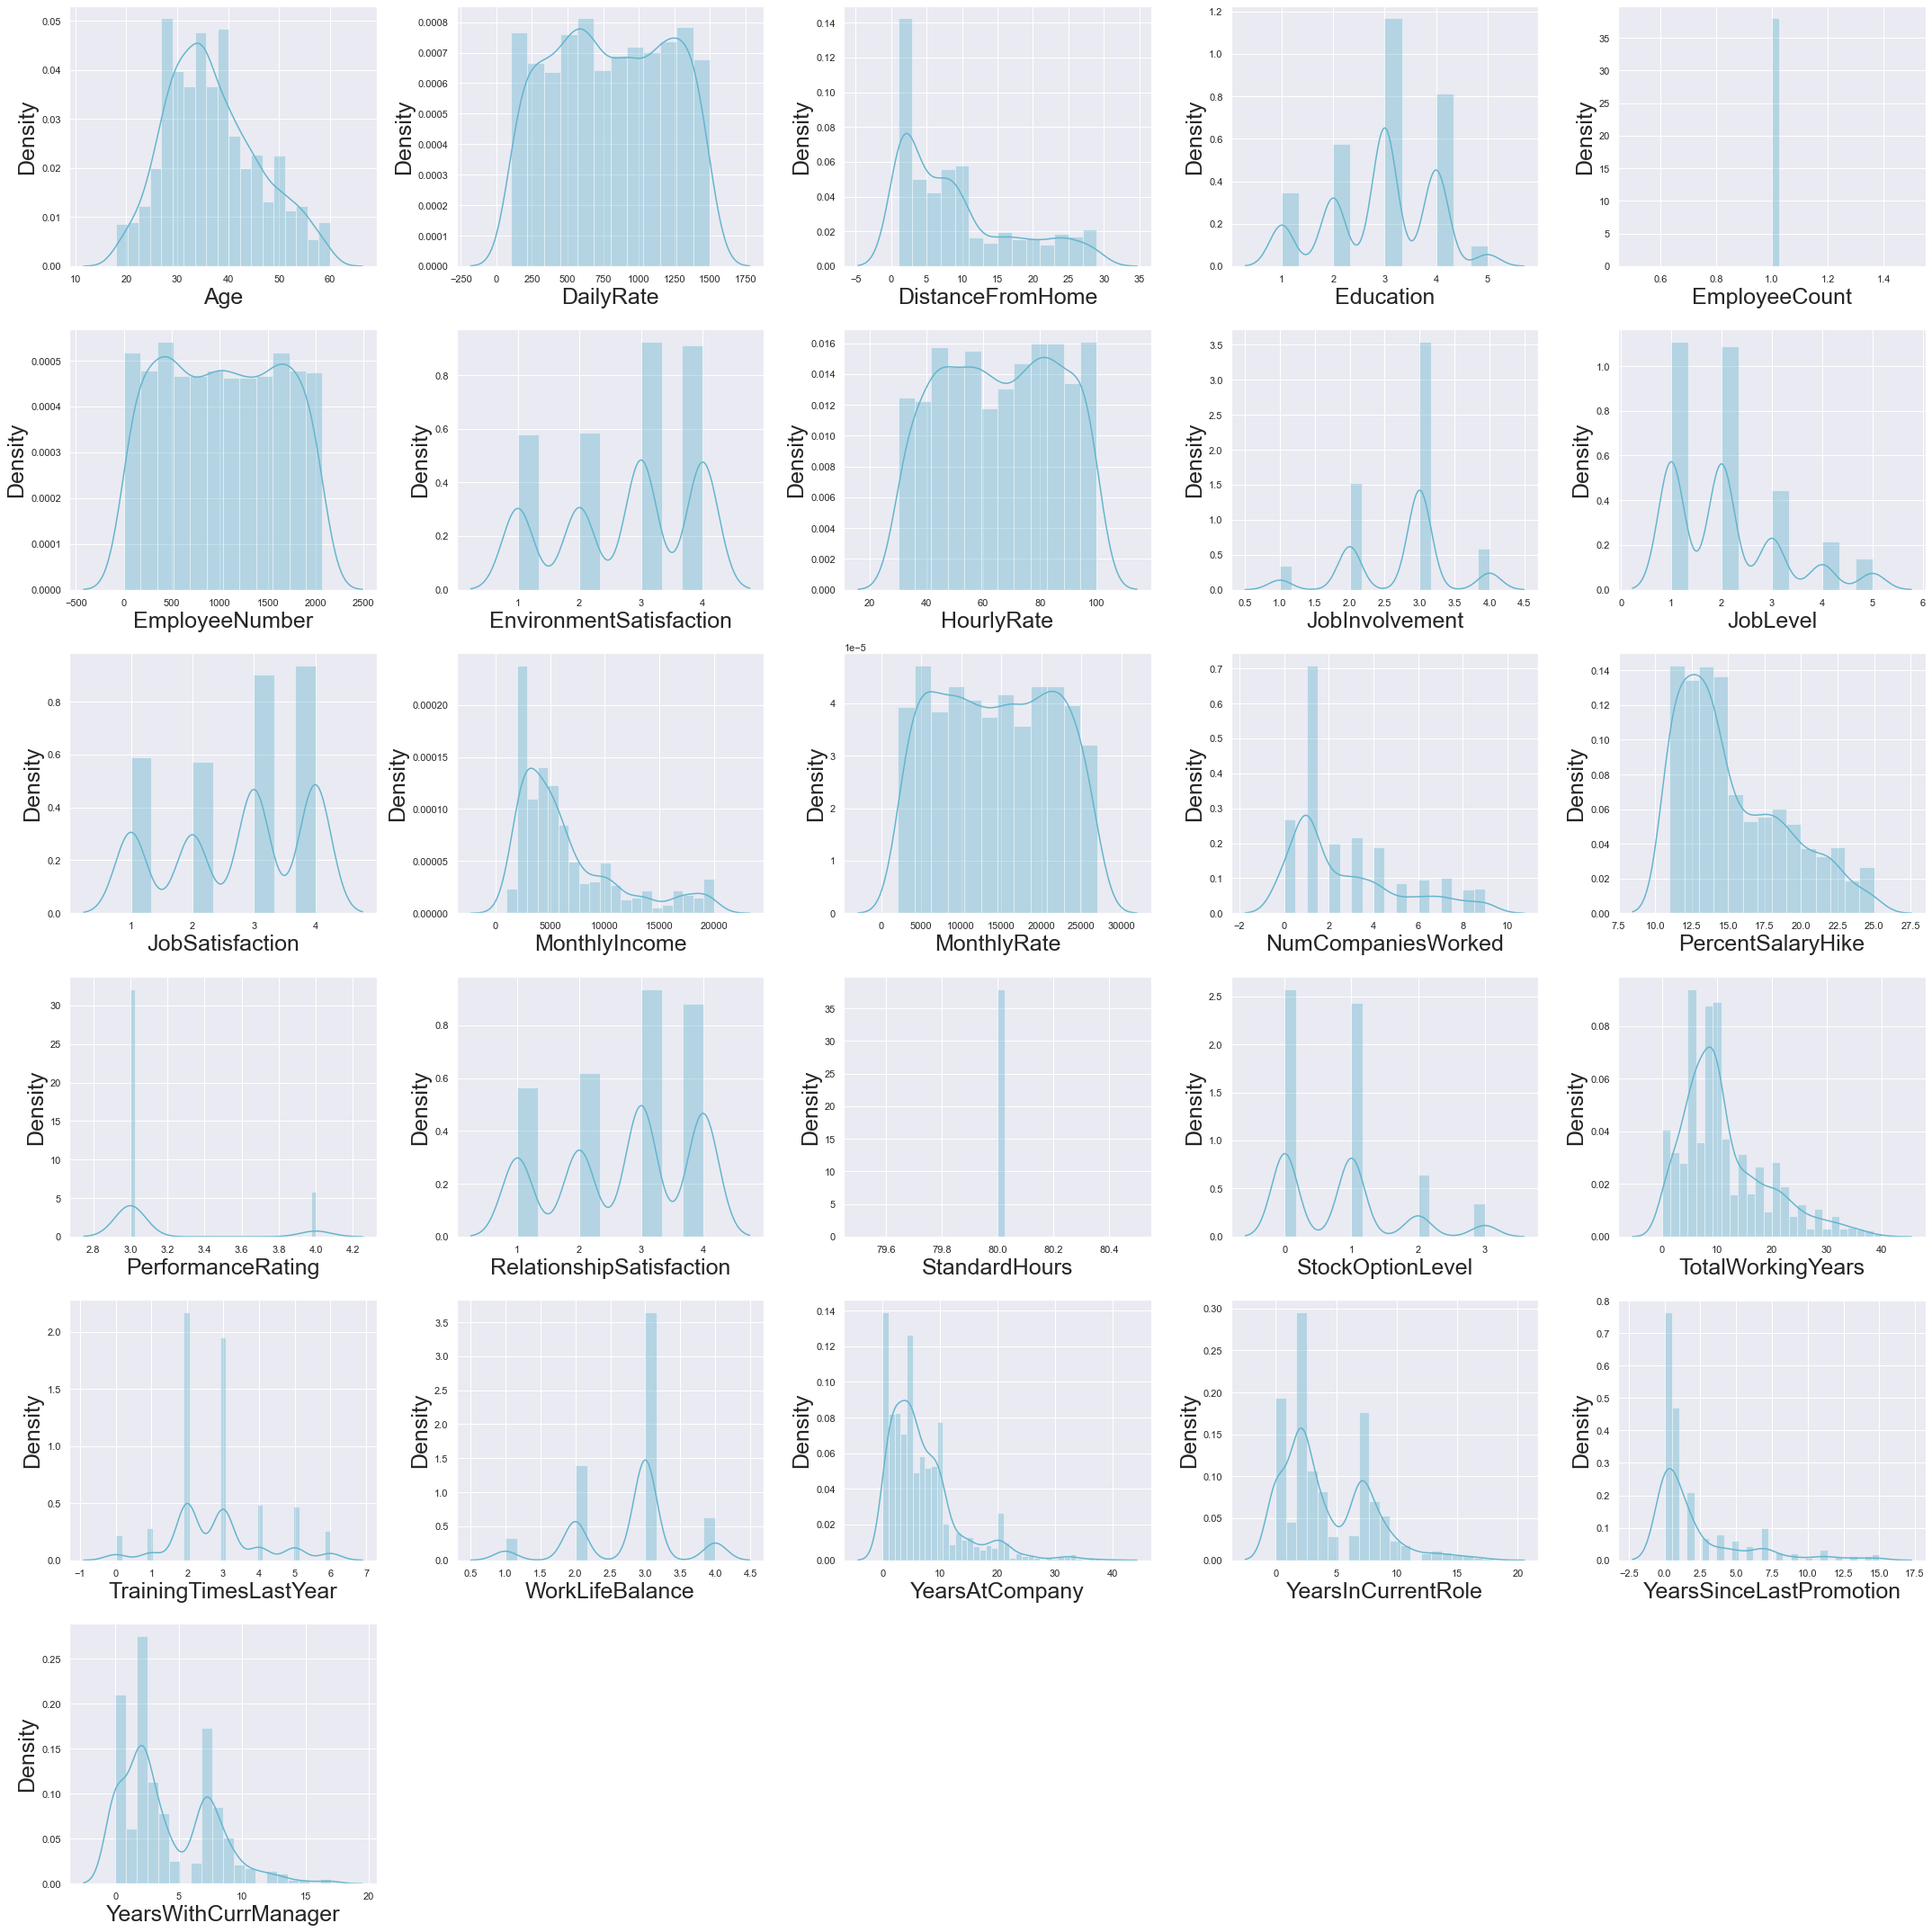

In [11]:
#Distribution plot for all numerical columns
sns.set(style="darkgrid")

plt.figure(figsize = (30,30))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=30:
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(df[column],color='c')
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
    plotnumber+=1
plt.tight_layout()

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
#Dropping the columns as its not significant
df.drop(columns=['EmployeeCount', 'StandardHours','EmployeeNumber','Over18'], inplace=True)

In [14]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

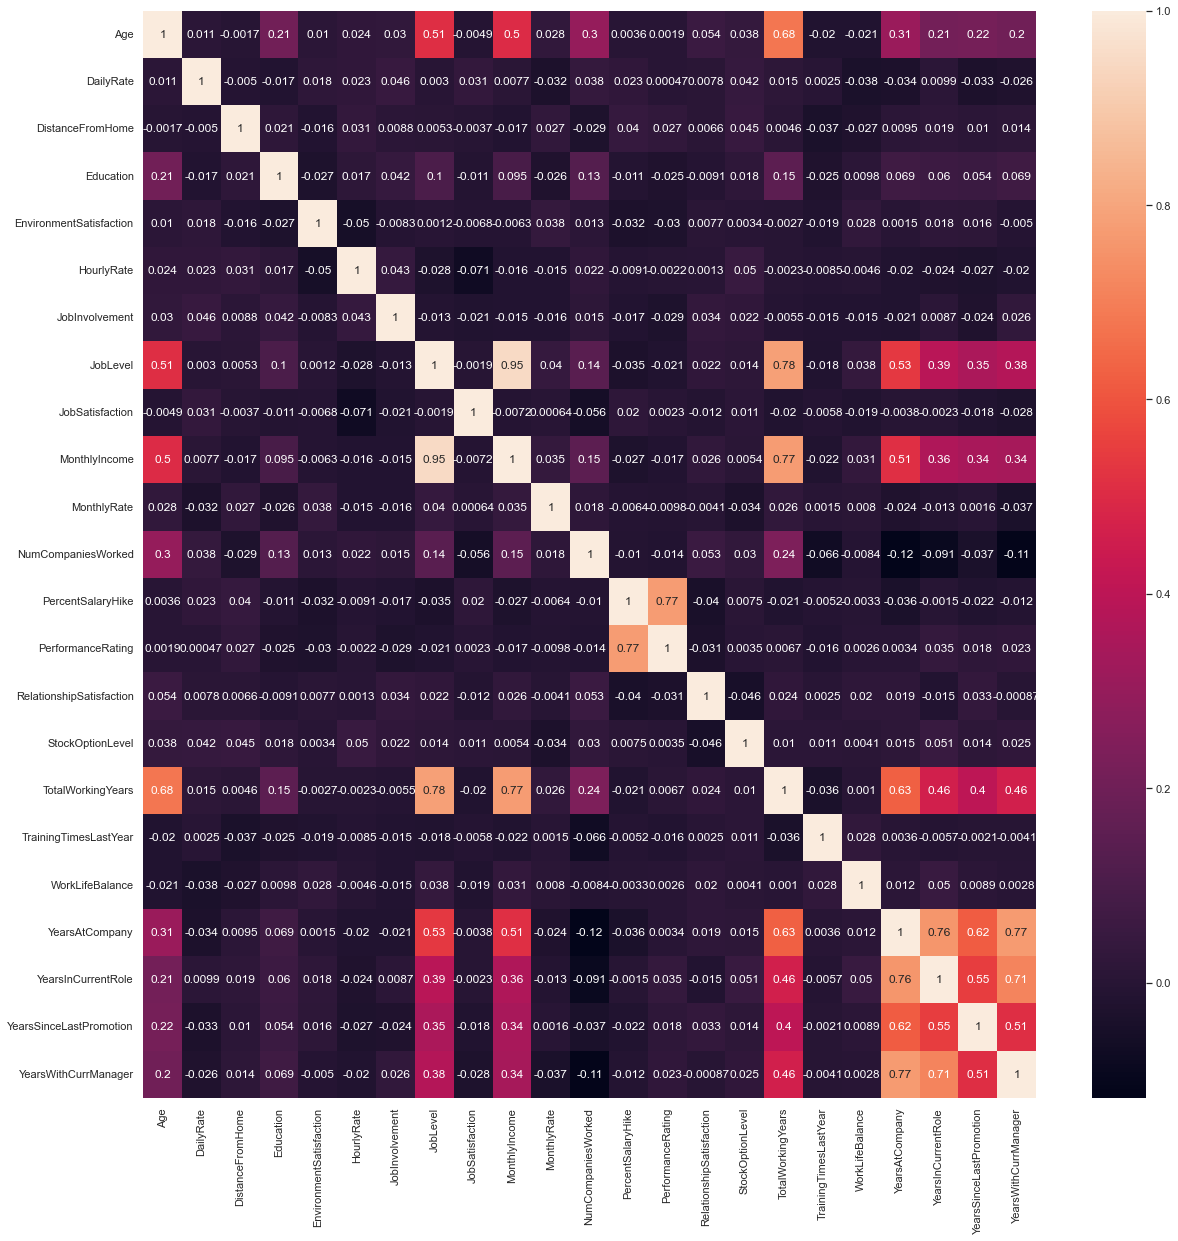

In [15]:
# corelation through heatmap visualization
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

Heat map showing thr correlation in the data set

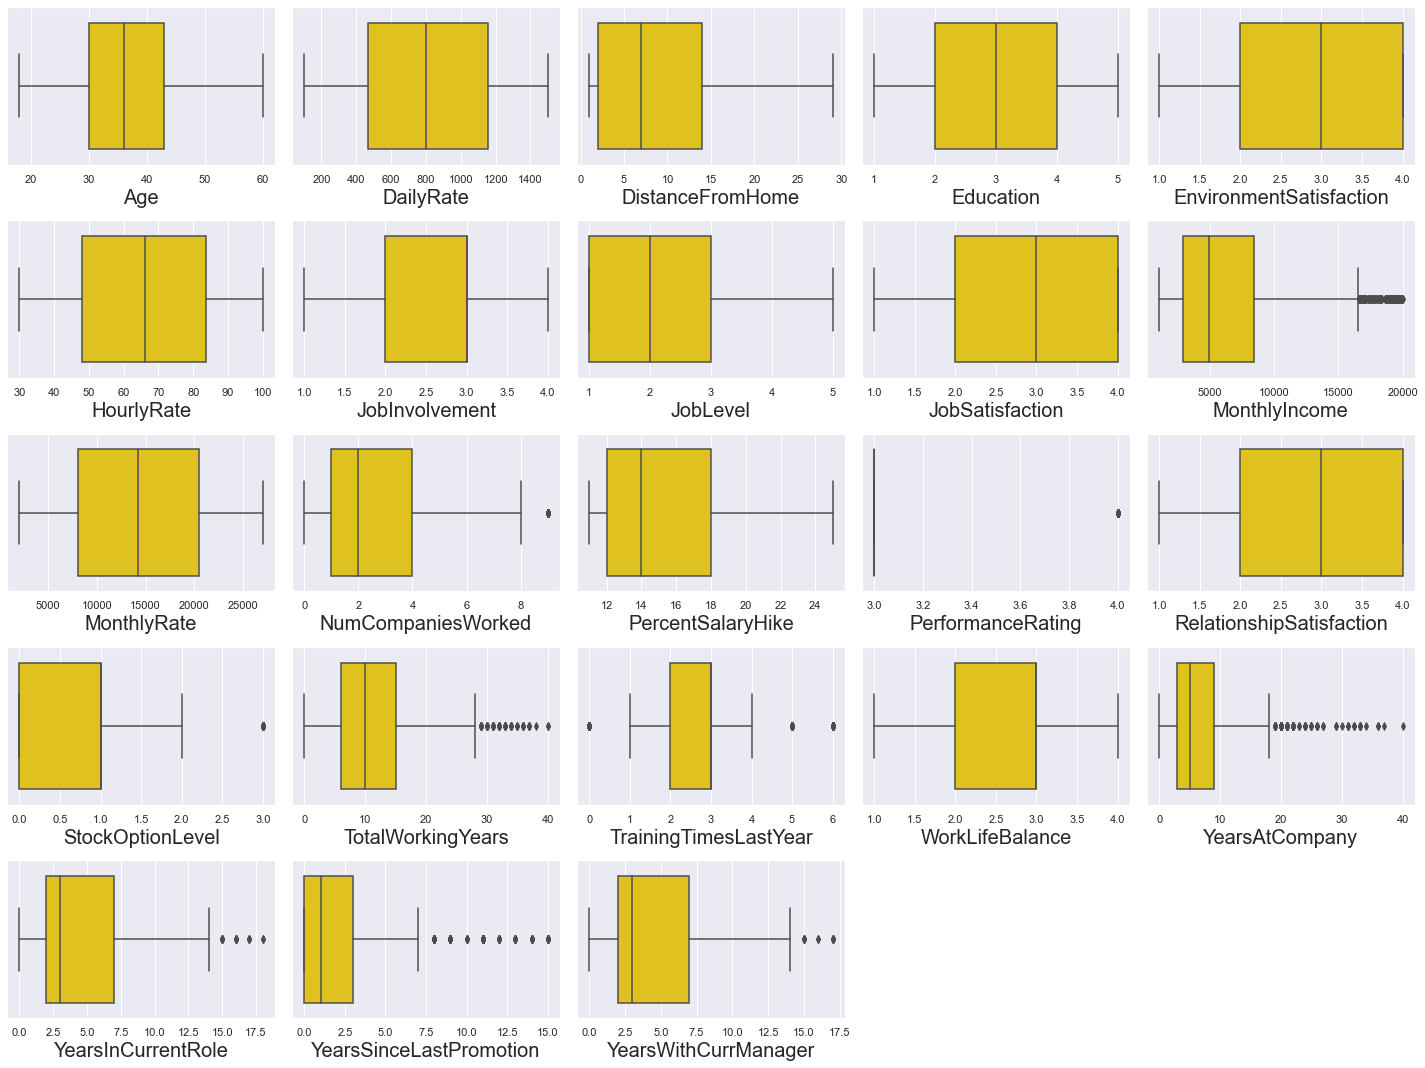

In [16]:
# Identifying the outliers using boxplot
numerical_columns1=['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns1:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

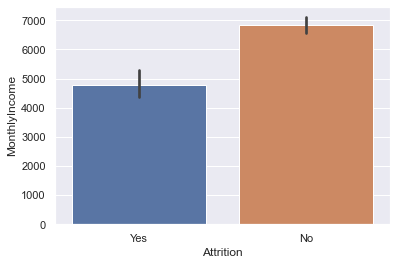

In [17]:
sns.barplot(y='MonthlyIncome', x='Attrition', data=df)
plt.show()

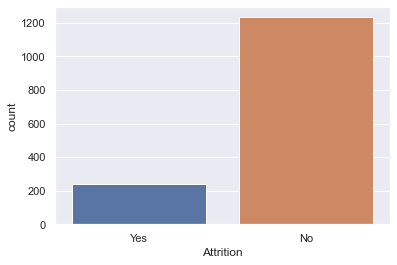

In [18]:
sns.countplot(df['Attrition'])
plt.show()

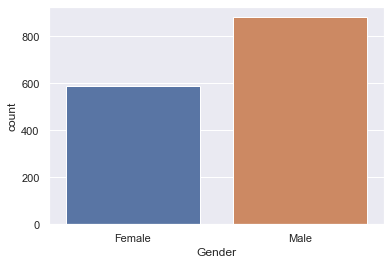

In [19]:
sns.countplot(df['Gender'])
plt.show()

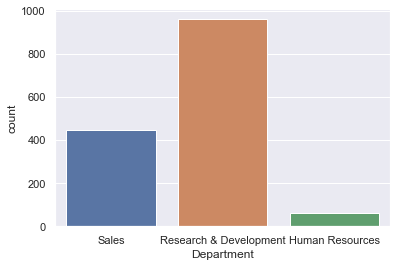

In [20]:
sns.countplot(df['Department'])
plt.show()

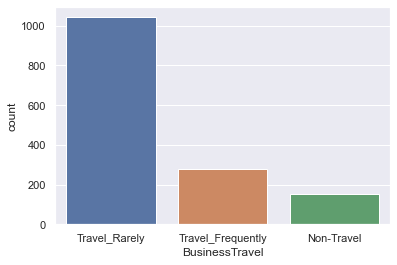

In [22]:
sns.countplot(df['BusinessTravel'])
plt.show()

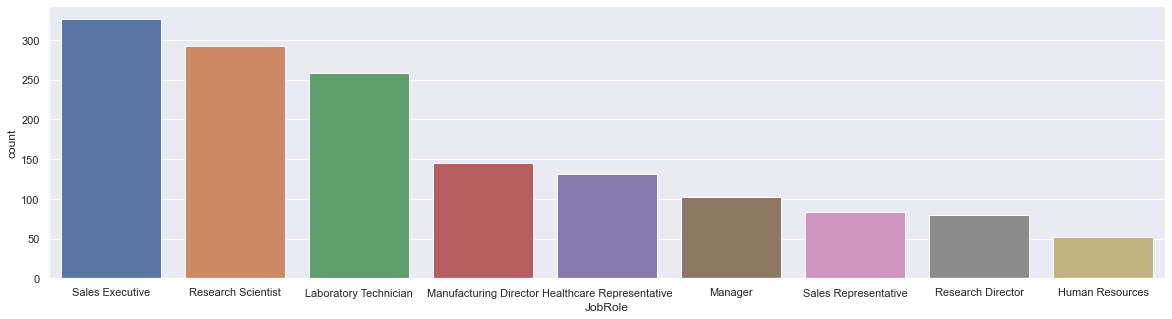

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(df['JobRole'])
plt.show()

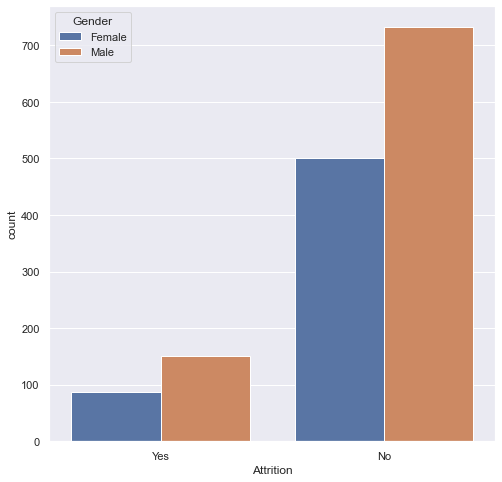

In [26]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['Attrition'],hue=df['Gender'])

plt.savefig("aaa")
plt.show()

In the data set male are more frequently leaving the organisation

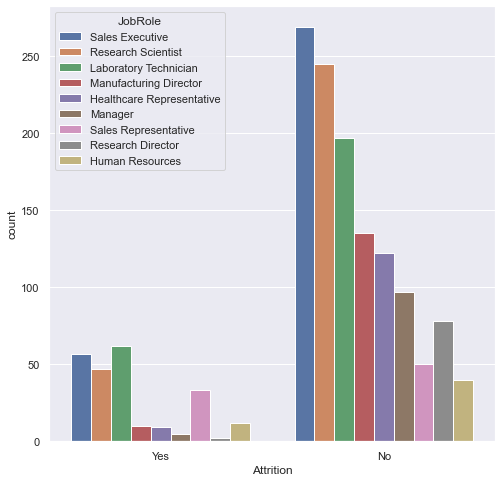

In [27]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['Attrition'],hue=df['JobRole'])

plt.savefig("aaa")
plt.show()

#### lab technitions are more frequently leaving the organisation followed by sales excutives

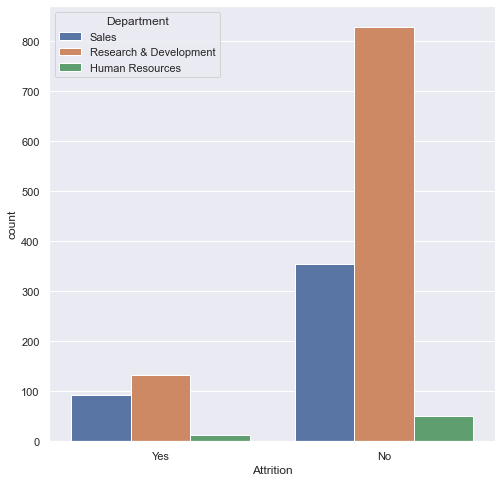

In [28]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['Attrition'],hue=df['Department'])

plt.savefig("aaa")
plt.show()

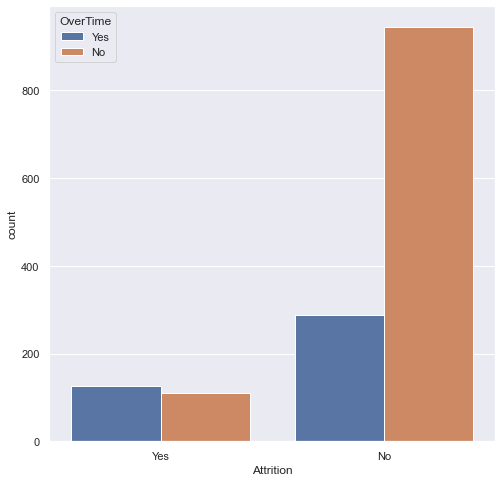

In [30]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['Attrition'],hue=df['OverTime'])

plt.savefig("aaa")
plt.show()

employee doing overtime are slightly more frequently changing the organisation

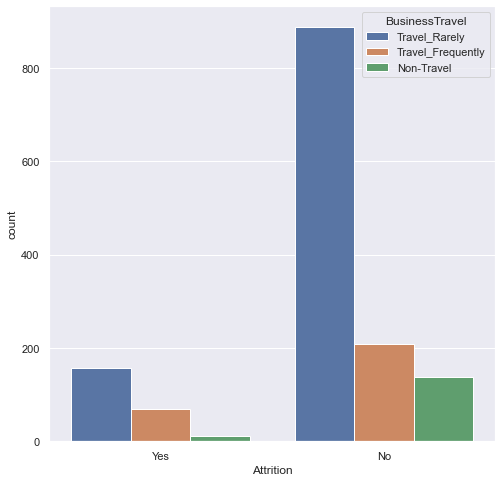

In [31]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['Attrition'],hue=df['BusinessTravel'])

plt.savefig("aaa")
plt.show()

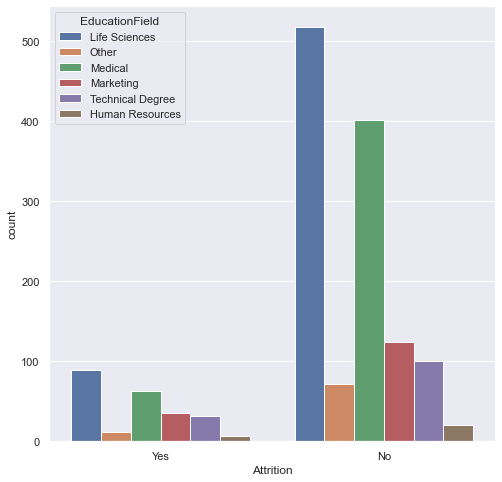

In [32]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['Attrition'],hue=df['EducationField'])

plt.savefig("aaa")
plt.show()

### Attriation in life science people are more as compared to other

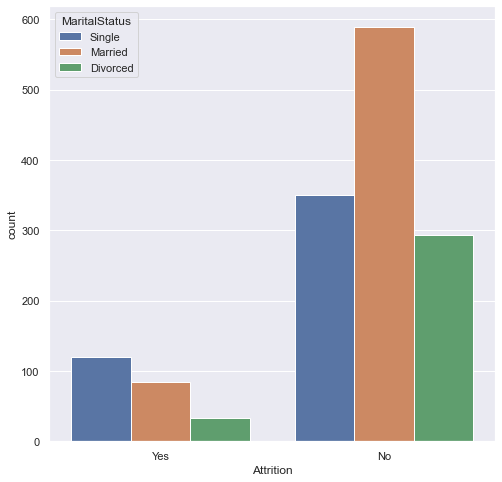

In [33]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['Attrition'],hue=df['MaritalStatus'])

plt.savefig("aaa")
plt.show()

Single or unmarreid employee are more habbitual to change the organisation

In [36]:
# Using the LabelEncoder on below categorical data to change it to numeric one 
from sklearn.preprocessing import LabelEncoder, StandardScaler


arr = ['Attrition', 'BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
le = LabelEncoder()

for i in arr:
    df[i] = le.fit_transform(df[i].astype(str))


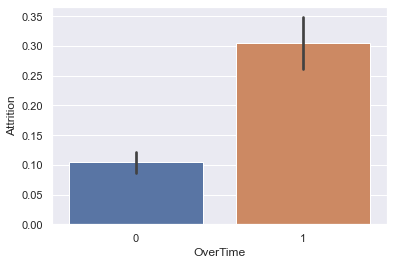

In [37]:
sns.barplot(x='OverTime', y='Attrition', data=df)
plt.show()

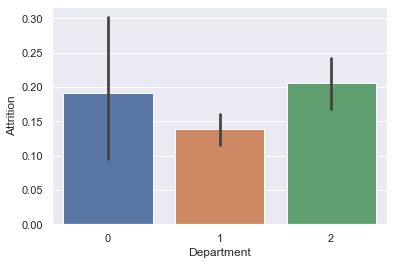

In [38]:
sns.barplot(x='Department', y='Attrition', data=df)
plt.show()

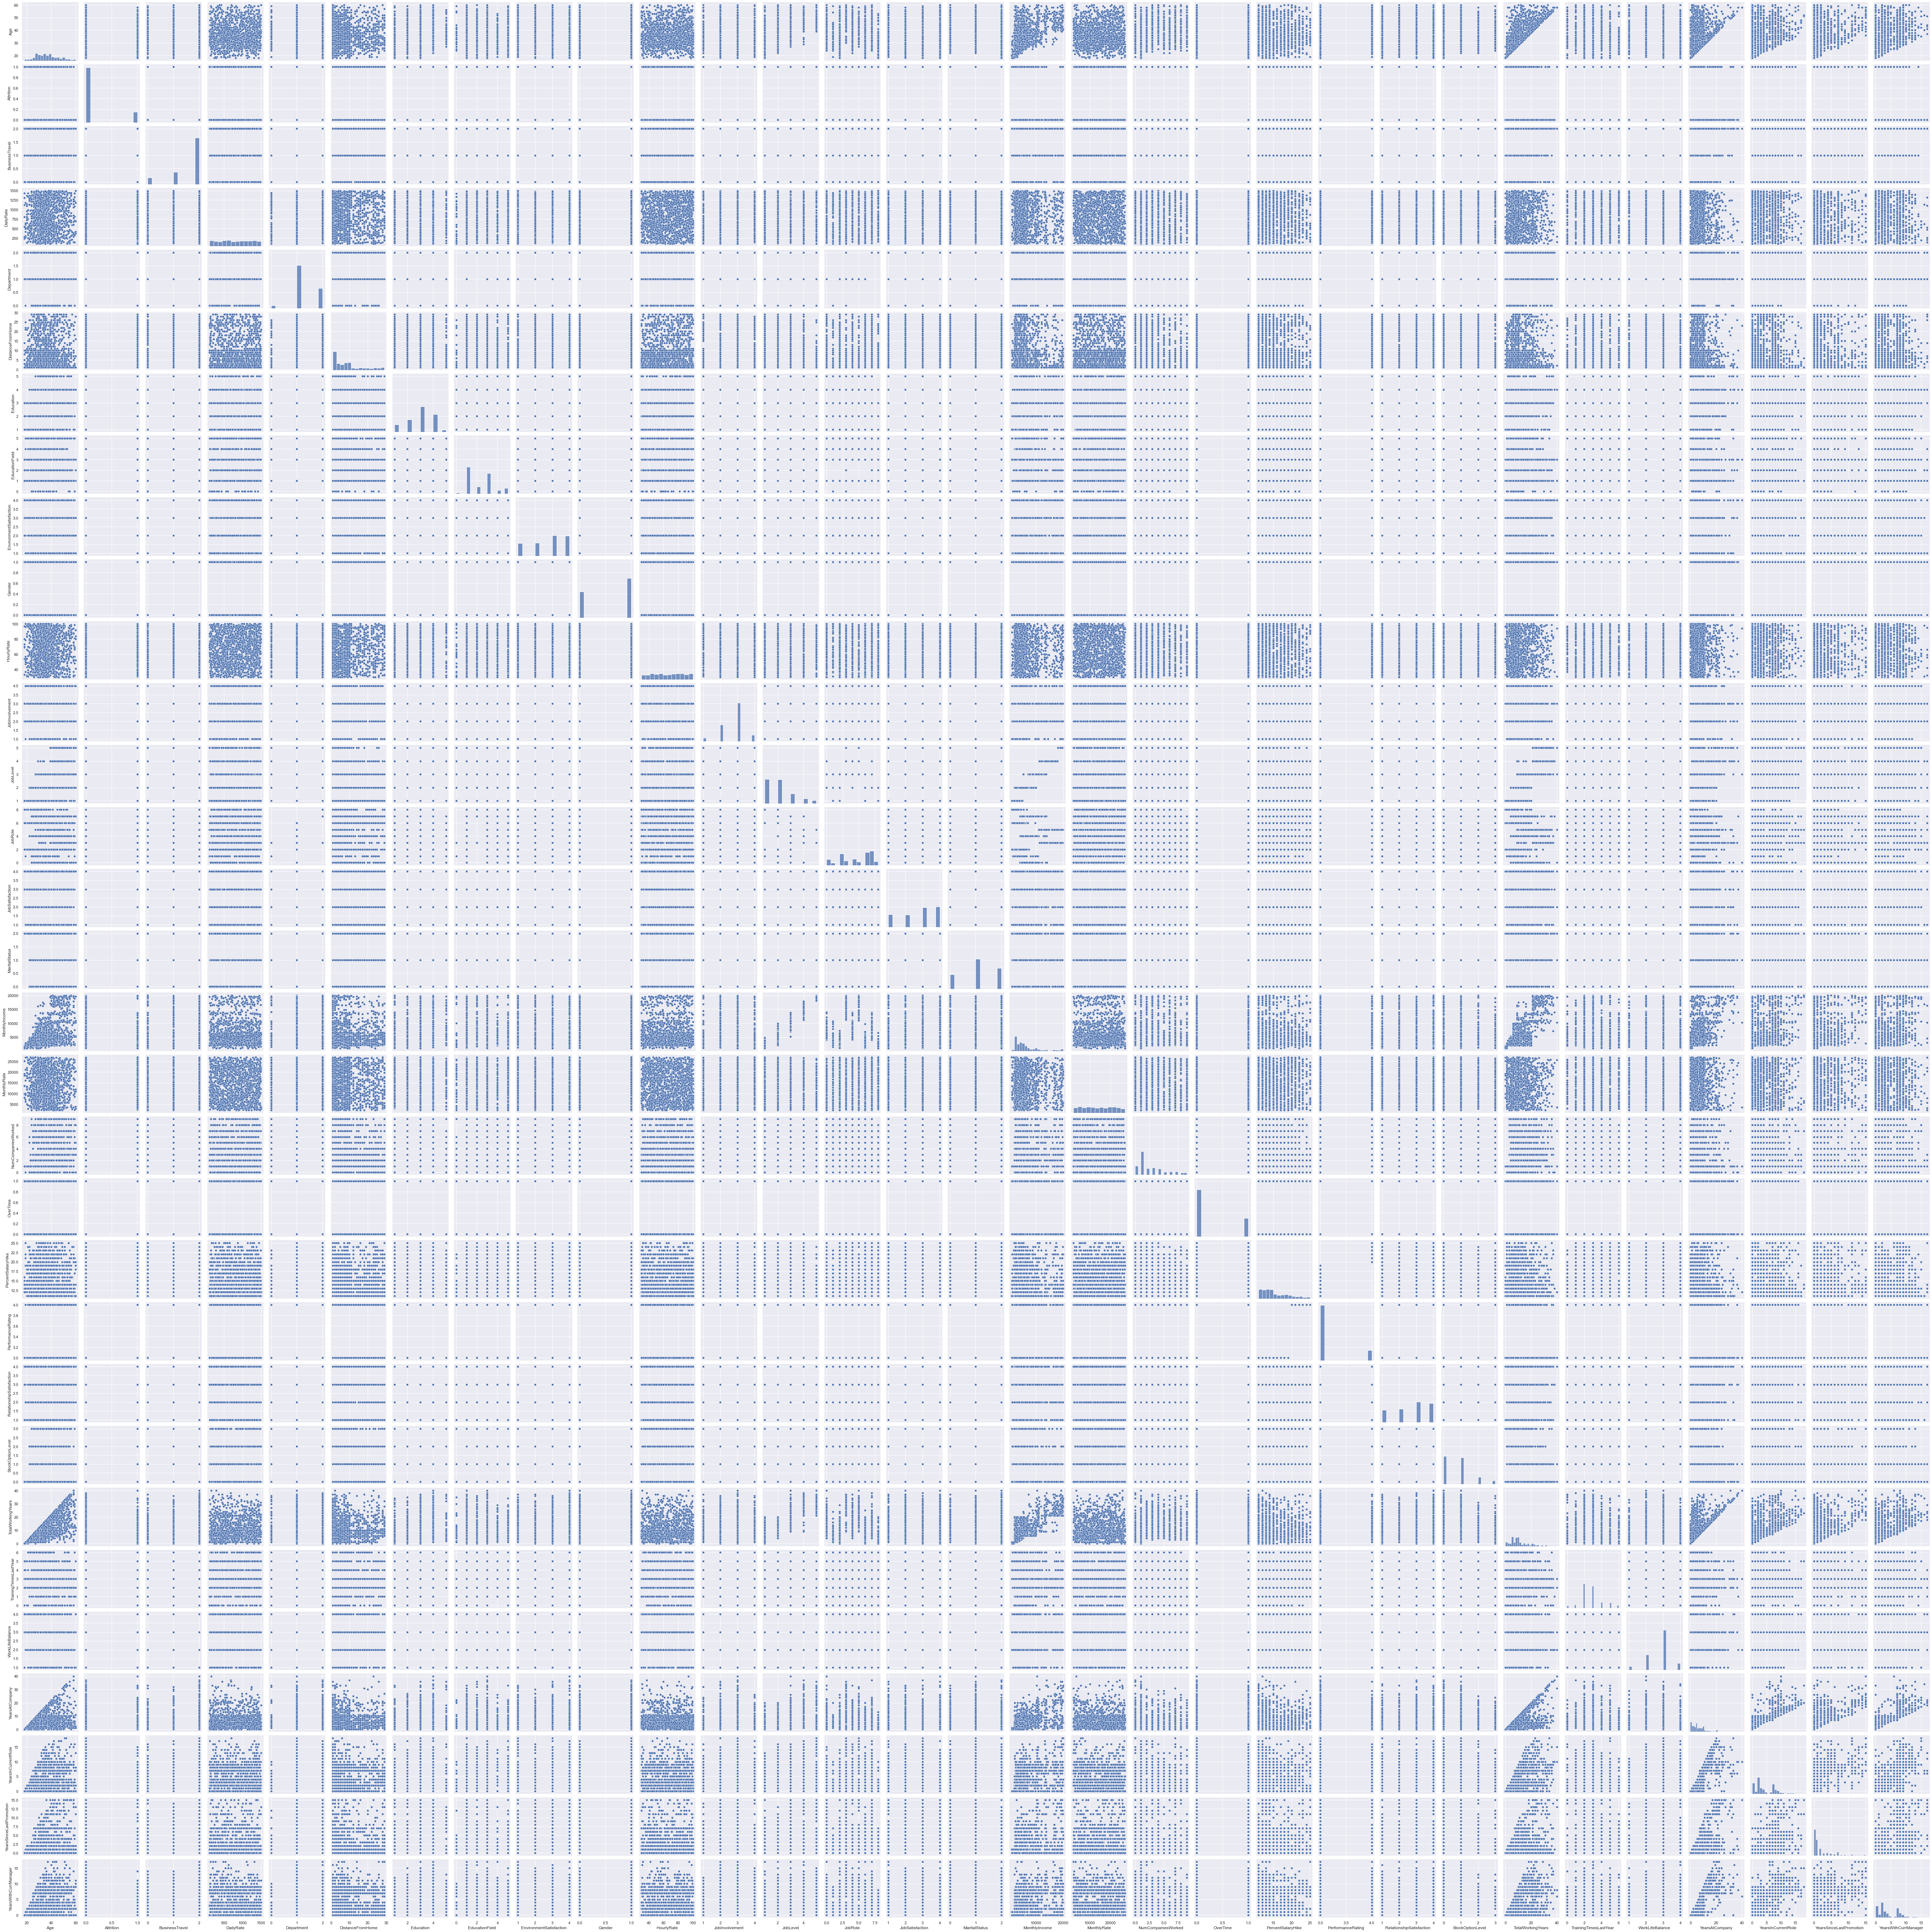

In [39]:
sns.pairplot(df)
plt.show()

In [40]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2       0  ...   
1             1               1                        3       1  ...   
2             2               4                        4       1  ...   
3             4               1                        4       0  ...   
4             1               3                        1       1  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       1  ...   
1466          1               3                        4       1  ...   
1467          3               1                        2       1  ...   
1468          3               3                        4       1  ...   
1469          3               3                        2       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [41]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore

for i in df.columns:
    df_copy = df.drop(i, axis=1 )
    z = np.abs(zscore(df_copy))
    df_new = df_copy [(z<3).all(axis=1)]
    print (df_new.shape, i)

(1387, 30) Age
(1387, 30) Attrition
(1387, 30) BusinessTravel
(1387, 30) DailyRate
(1387, 30) Department
(1387, 30) DistanceFromHome
(1387, 30) Education
(1387, 30) EducationField
(1387, 30) EnvironmentSatisfaction
(1387, 30) Gender
(1387, 30) HourlyRate
(1387, 30) JobInvolvement
(1387, 30) JobLevel
(1387, 30) JobRole
(1387, 30) JobSatisfaction
(1387, 30) MaritalStatus
(1387, 30) MonthlyIncome
(1387, 30) MonthlyRate
(1387, 30) NumCompaniesWorked
(1387, 30) OverTime
(1387, 30) PercentSalaryHike
(1387, 30) PerformanceRating
(1387, 30) RelationshipSatisfaction
(1387, 30) StockOptionLevel
(1396, 30) TotalWorkingYears
(1387, 30) TrainingTimesLastYear
(1387, 30) WorkLifeBalance
(1397, 30) YearsAtCompany
(1396, 30) YearsInCurrentRole
(1412, 30) YearsSinceLastPromotion
(1393, 30) YearsWithCurrManager


In [42]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(df))
print ('Before removing zscore: ', df.shape)

df_final = df.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", df_final.shape)

Before removing zscore:  (1470, 31)
After removing zscore:  (1387, 31)


In [43]:
# Assigning the input and output data
df_x = df.drop(columns = ['Attrition'])
y = df['Attrition']

In [44]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [45]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

In [46]:
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.446350        0.590048   0.742527    1.401512         -1.010909   
1     1.322365       -0.913194  -1.297775   -0.493817         -0.147150   
2     0.008343        0.590048   1.414363   -0.493817         -0.887515   
3    -0.429664       -0.913194   1.461466   -0.493817         -0.764121   
4    -1.086676        0.590048  -0.524295   -0.493817         -0.887515   
...        ...             ...        ...         ...               ...   
1465 -0.101159       -0.913194   0.202082   -0.493817          1.703764   
1466  0.227347        0.590048  -0.469754   -0.493817         -0.393938   
1467 -1.086676        0.590048  -1.605183   -0.493817         -0.640727   
1468  1.322365       -0.913194   0.546677    1.401512         -0.887515   
1469 -0.320163        0.590048  -0.432568   -0.493817         -0.147150   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
0     -0.891688       -0.937414                -0.660531 -1.224745   
1     -1.868426       -0.937414                 0.254625  0.816497   
2     -0.891688        1.316673                 1.169781  0.816497   
3      1.061787       -0.937414                 1.169781 -1.224745   
4     -1.868426        0.565311                -1.575686  0.816497   
...         ...             ...                      ...       ...   
1465  -0.891688        0.565311                 0.254625  0.816497   
1466  -1.868426        0.565311                 1.169781  0.816497   
1467   0.085049       -0.937414                -0.660531  0.816497   
1468   0.085049        0.565311                 1.169781  0.816497   
1469   0.085049        0.565311                -0.660531  0.816497   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0       1.383138  ...          -0.426230                 -1.584178   
1      -0.240677  ...           2.346151                  1.191438   
2       1.284725  ...          -0.426230                 -0.658973   
3      -0.486709  ...          -0.426230                  0.266233   
4      -1.274014  ...          -0.426230                  1.191438   
...          ...  ...                ...                       ...   
1465   -1.224807  ...          -0.426230                  0.266233   
1466   -1.175601  ...          -0.426230                 -1.584178   
1467    1.038693  ...           2.346151                 -0.658973   
1468   -0.142264  ...          -0.426230                  1.191438   
1469    0.792660  ...          -0.426230                 -1.584178   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.932014          -0.421642              -2.171982   
1             0.241988          -0.164511               0.155707   
2            -0.932014          -0.550208               0.155707   
3            -0.932014          -0.421642               0.155707   
4             0.241988          -0.678774               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.735447               0.155707   
1466          0.241988          -0.293077               1.707500   
1467          0.241988          -0.678774              -2.171982   
1468         -0.932014           0.735447               0.155707   
1469         -0.932014          -0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.493820       -0.164613           -0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096       -1.144294           -1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096       -0.817734           -0.615492   
...               ...             ...                 ...   
1465         0.338096       -0.327893           -0.615492   
1466         0.338096       -0.001333            0.764998   
1467         0.338096       -0.164613           -0.615492   
1

In [47]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [59]:
# Subroutine to get the best random state with maximum accuracy score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [61]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LR = LogisticRegression()
GNB = GaussianNB()

In [62]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RFC))
models.append(('LogisticRegression', LR))
models.append(('GaussianNB', GNB))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  55  is:  0.8775510204081632
KNeighborsClassifier()
Predicted values:  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


Accuracy score:  0.8734567901234568


cross val score:  0.8482993197278912


[0.         0.03180212 1.        ] [0.        0.2195122 1.       ] [2 1 0]
roc auc score:  

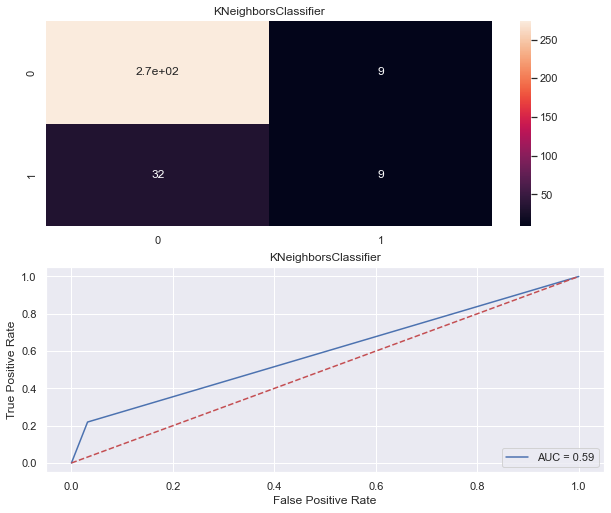

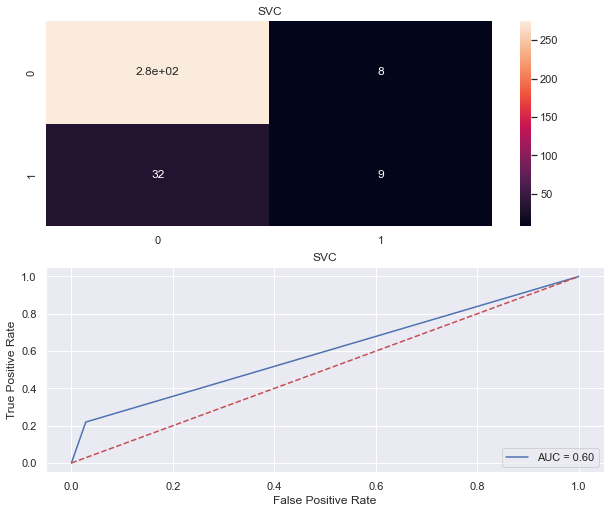

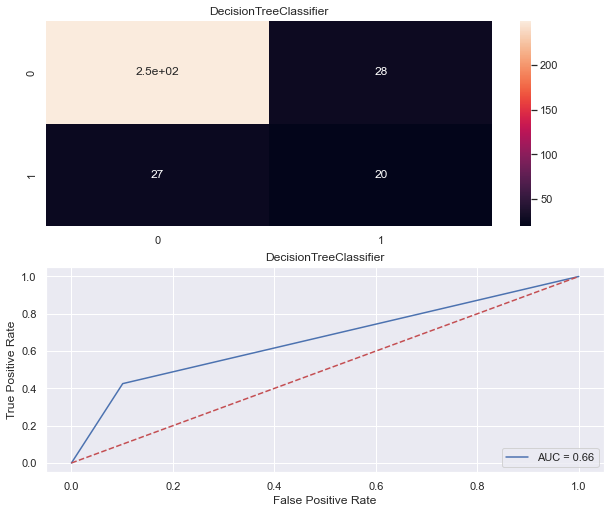

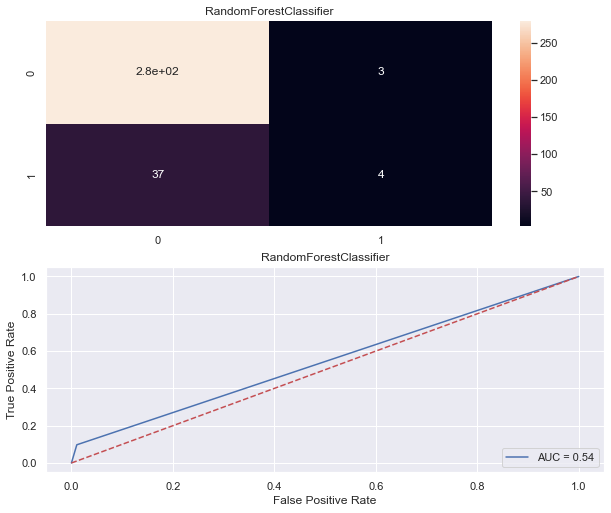

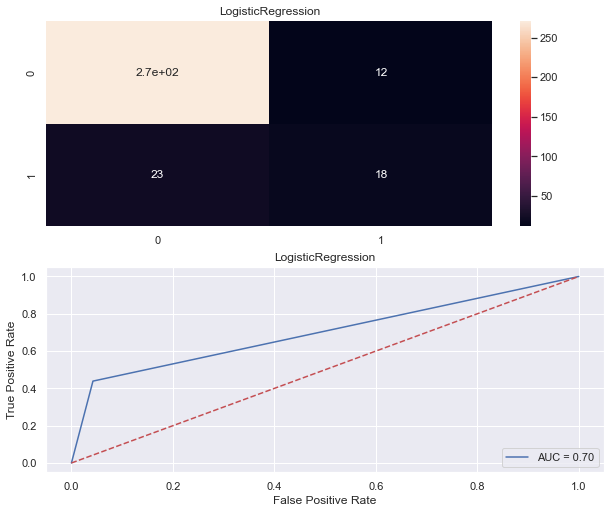

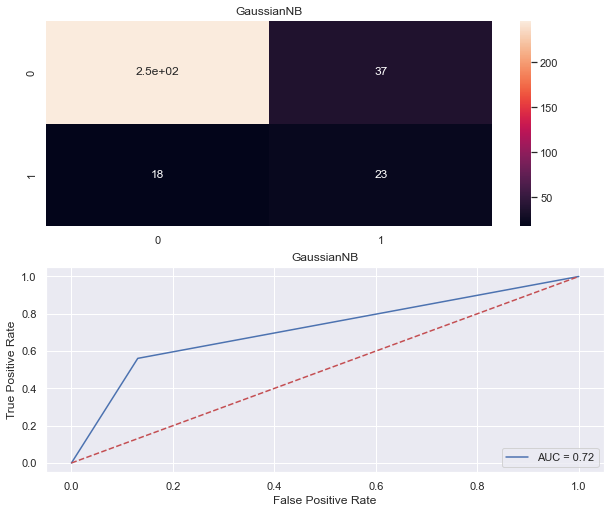

In [63]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .22)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [64]:
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

Model  Accuracy_Score  Cross Val Score  ROC_AUC_Curve  \
0    KNeighborsClassifier       87.345679        84.829932      59.385504   
1                     SVC       87.654321        85.782313      59.562182   
2  DecisionTreeClassifier       83.024691        79.523810      66.222444   
3  RandomForestClassifier       87.654321        85.578231      54.348013   
4      LogisticRegression       89.197531        86.530612      69.831078   
5              GaussianNB       83.024691        78.571429      71.511678   

   RandomState  
0           55  
1           55  
2           86  
3           55  
4           55  
5           42

In [65]:
#I chose LogisticRegression as it gives the best results 

# GridSearchCV for LogisticRegression
parameters = { 'penalty': ['l1', 'l2'], 'C': [0.001, 1, 10, 100, 1000, 0.01, 0.1]}
gsc = GridSearchCV(estimator = LR, param_grid = parameters, cv=10)
gsc.fit(x,y)
gsc.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=55, test_size = 0.20)
lreg = LogisticRegression(C= 0.1, penalty= 'l2')
lreg.fit(x_train, y_train)
y_pred =  lreg.predict(x_test)
print (y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [67]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_HRAnalytics.csv')

accuracy score:  0.8979591836734694
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       260
           1       0.61      0.32      0.42        34

    accuracy                           0.90       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.88      0.90      0.88       294

Confusion_matrix:  [[253   7]
 [ 23  11]]
cross val score:  0.8680272108843535
roc auc score:  0.6483031674208144
AxesSubplot(0.125,0.808774;0.62x0.0712264)





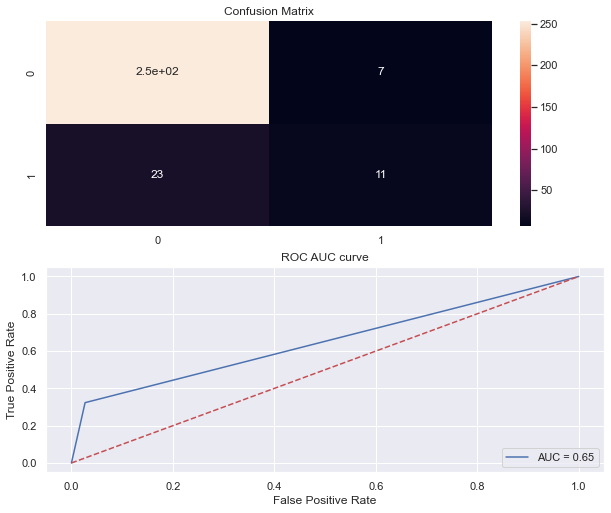

In [68]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(lreg, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')